# Treinando modelos

## Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Regressão Linear

### Métodos dos mínimos quadrados

<p align='justify'>Função matemática que minimiza a função de custo: </p>

#### Gerando alguns dados com aparência linear

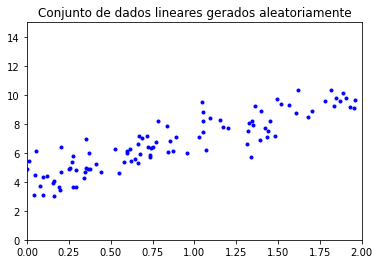

In [8]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.title('Conjunto de dados lineares gerados aleatoriamente')
plt.show()

#### Calculando o valor que minimiza a função de custo

In [9]:
X_b = np.c_[np.ones((100, 1)), X] #adiciona x0=1 a cada instância
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.07981717],
       [2.97402226]])

#### Fazendo previsões

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #adiciona x0=1 a cada instância
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.07981717],
       [10.02786168]])

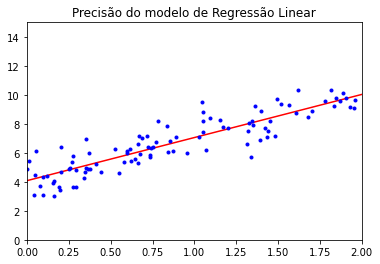

In [12]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.title('Precisão do modelo de Regressão Linear')
plt.show()

#### Equivalente usando Scikit-Learn

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07981717]), array([[2.97402226]]))

In [14]:
lin_reg.predict(X_new)

array([[ 4.07981717],
       [10.02786168]])